Задание 1.

 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?


 Подгруппа – Sub-Category

 Дата – Order_date

 Сделать вывод на основе полученных результатов.


In [170]:
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/export?format=csv&gid=1477722452'

df = pd.read_csv(url)

df.head()


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [157]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

df.dtypes


,0
ID,int64
Order Date,datetime64[ns]
Class,object
Region,object
Sub-Category,object
Sales,object


In [158]:
# Наиболее продаваемые подгруппы товаров за все время
subgroup_total = df['Sub-Category'].value_counts().head(5)
subgroup_total


,count
Sub-Category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876
Storage,832


In [159]:
# Наиболее продаваемые подгруппы товаров за последние два года

two_years = df[df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(years=2)]
subgroup_last_two_years = two_years['Sub-Category'].value_counts().head(5)
subgroup_last_two_years

,count
Sub-Category,
Binders,907
Paper,810
Furnishings,558
Phones,511
Storage,492


In [160]:
# Наиболее продаваемые подгруппы товаров за последний год

last_year = df[df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(years=1)]
subgroup_last_year = last_year['Sub-Category'].value_counts().head(5)
subgroup_last_year


,count
Sub-Category,
Binders,496
Paper,454
Furnishings,310
Phones,291
Storage,283


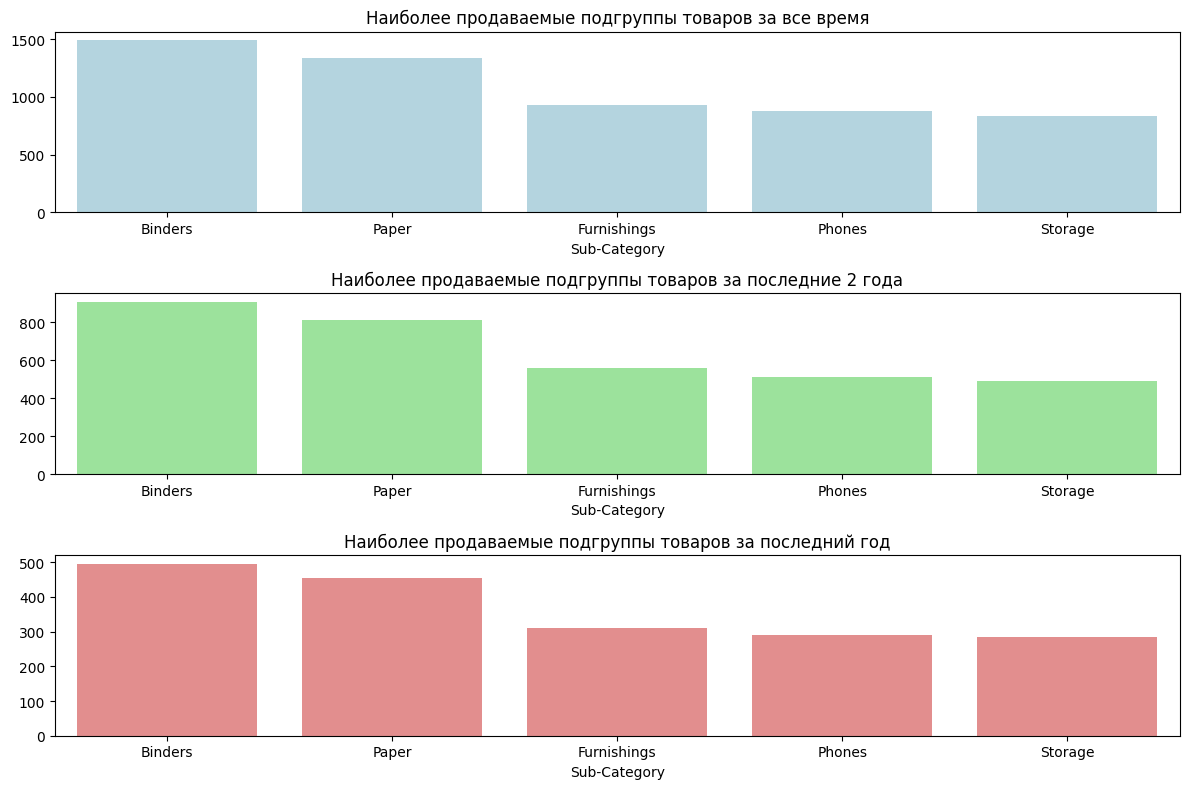

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Первый график
plt.subplot(3, 1, 1)
sns.barplot(x=subgroup_total.index, y=subgroup_total.values, color='lightblue')
plt.title('Наиболее продаваемые подгруппы товаров за все время')

# Второй график
plt.subplot(3, 1, 2)
sns.barplot(x=subgroup_last_two_years.index, y=subgroup_last_two_years.values, color='lightgreen')
plt.title('Наиболее продаваемые подгруппы товаров за последние 2 года')

# Третий график
plt.subplot(3, 1, 3)
sns.barplot(x=subgroup_last_year.index, y=subgroup_last_year.values, color='lightcoral')
plt.title('Наиболее продаваемые подгруппы товаров за последний год')

plt.tight_layout()
plt.show()


На основе полученных результатов можно сделать вывод, что топ продаваемых категорий не меняется со временем

Задание 2

Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).

Можно использовать правило трех сигм. Однако любые другие решения приветствуются.


In [171]:
# Конвертируем тип данных на float
df['Sales'] = df['Sales'].astype(str).str.replace(',', '.')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
print(df['Sales'].isna().sum())
print(df['Sales'].dtype)

0
float64


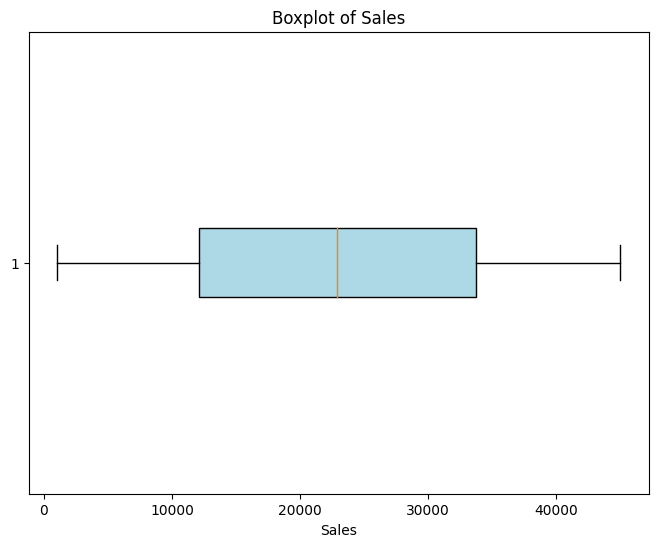

In [172]:
import matplotlib.pyplot as plt

# Строим boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()


In [173]:
# Среднее значение и стандартное отклонение
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

# Примененяем правило трёх сигм
lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales

# Фильтруем данные, оставляя только те строки, которые попадают в границы нормальных значений
filtered_data = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

print(f"Границы нормальных значений: от {lower_bound} до {upper_bound}")


Границы нормальных значений: от -14884.241709201222 до 60727.757182262445


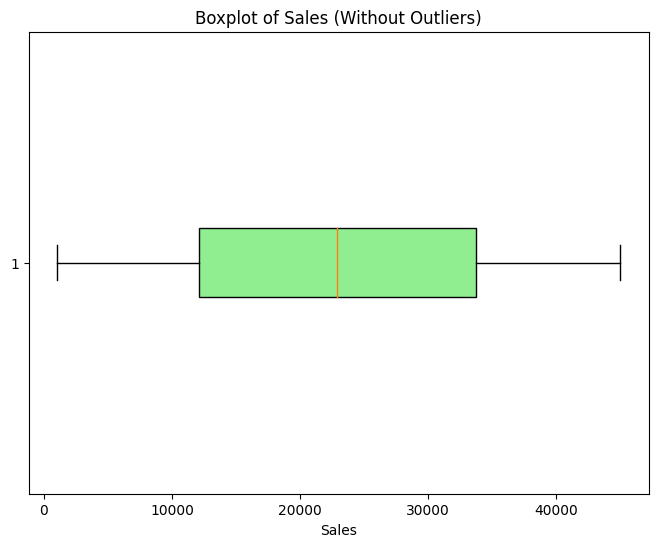

In [174]:
# Строим очищенный boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.title('Boxplot of Sales (очищенный)')
plt.xlabel('Sales')
plt.show()


Судя по графикам либо в данных очень мало выбросов, либо нет совсем. Попробуем применить метод межквартильного размаха

In [175]:
# Вычисляем квартили и IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные без выбросов
filtered_data_iqr = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

print(f"Границы выбросов по IQR: от {lower_bound} до {upper_bound}")
print(f"Количество выбросов по IQR: {len(df) - len(filtered_data_iqr)}")


Границы выбросов по IQR: от -20256.132499999996 до 66121.8875
Количество выбросов по IQR: 0


Выбросов действительно нет

Задание 3

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales

Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [176]:
min_sales = df['Sales'].min()
max_sales = df['Sales'].max()

print(f"Минимальные продажи: {min_sales}")
print(f"Максимальные продажи: {max_sales}")


Минимальные продажи: 1002.794
Максимальные продажи: 44995.41


In [177]:
# Определяем границы
bins = [min_sales, df['Sales'].quantile(0.33), df['Sales'].quantile(0.66), max_sales]
labels = ['Низкие продажи', 'Средние продажи', 'Высокие продажи']

df['Sale_group'] = pd.cut(df['Sales'], bins=bins, labels=labels, include_lowest=True)

df[['Sales', 'Sale_group']].head()


,Sales,Sale_group
0,37229.08,Высокие продажи
1,20994.61,Средние продажи
2,42133.86,Высокие продажи
3,10612.00,Низкие продажи
4,28781.13,Средние продажи


In [178]:
# Группируем данные по регионам и группам продаж
grouped_data = df.groupby(['Region', 'Sale_group'], observed=False).size().reset_index(name='Count')

print(grouped_data)


         Region       Sale_group  Count
0   Владивосток   Низкие продажи    933
1   Владивосток  Средние продажи    877
2   Владивосток  Высокие продажи    975
3    Калиниград   Низкие продажи   1027
4    Калиниград  Средние продажи   1082
5    Калиниград  Высокие продажи   1031
6        Москва   Низкие продажи    516
7        Москва  Средние продажи    529
8        Москва  Высокие продажи    553
9          Урал   Низкие продажи    758
10         Урал  Средние продажи    746
11         Урал  Высокие продажи    773


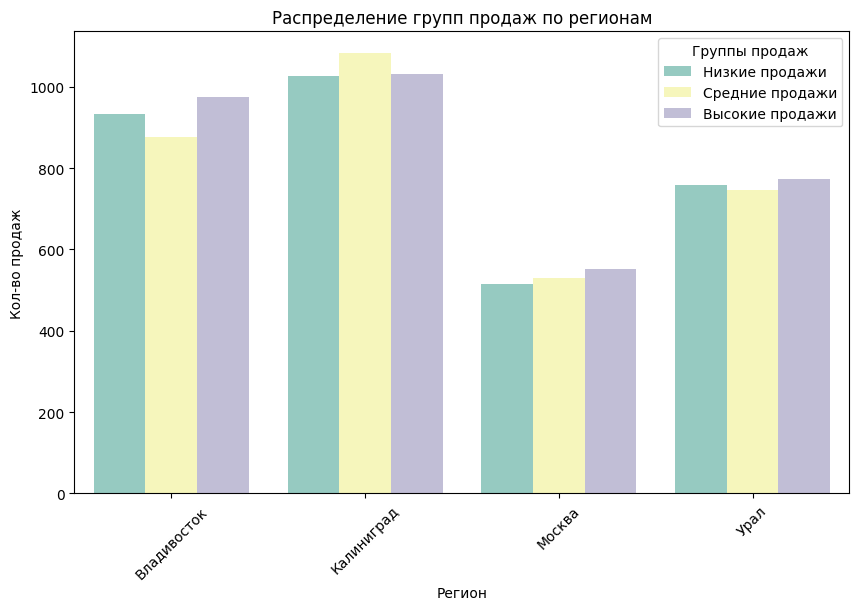

In [179]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Region', y='Count', hue='Sale_group', palette='Set3')

plt.title('Распределение групп продаж по регионам')
plt.ylabel('Кол-во продаж')
plt.xlabel('Регион')
plt.legend(title='Группы продаж')
plt.xticks(rotation=45)
plt.show()


По графику можно сделать выводы, что самое большое количество продаж по всем категориям в Калининграде, самое низкое - в Москве (это может быть связано с сильной конкуренцией). При этом группа высоких продаж преобладает во всех регионах, кроме Калининграда, где преобладают средние